In [32]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, RobustScaler

In [33]:
df = pd.read_csv('ID Access Card.csv')
df

,User Id,Gate Number,Day of Month,Time,ID Activity
0,4480013,8,9,9:35:46 AM,Not Active
1,8714242,2,12,11:16:16 AM,Active
2,4018706,7,30,12:39:25 PM,Not Active
3,5546910,7,15,9:25:34 AM,Not Active
4,4141903,3,13,9:55:18 AM,Active
...,...,...,...,...,...
996,1452679,8,29,1:02:18 PM,Active
997,5511387,2,9,3:14:39 PM,Not Active
998,1003300,6,9,10:09:58 AM,Active
999,7557706,1,13,2:52:49 PM,Active


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User Id       1001 non-null   int64 
 1   Gate Number   1001 non-null   int64 
 2   Day of Month  1001 non-null   int64 
 3   Time          1001 non-null   object
 4   ID Activity   1001 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [35]:
df.describe()

,User Id,Gate Number,Day of Month
count,1.001000e+03,1001.000000,1001.000000
mean,4.869352e+06,4.957043,15.319680
std,2.270853e+06,2.628527,8.658389
min,1.003300e+06,1.000000,1.000000
25%,2.880797e+06,3.000000,8.000000
50%,4.873982e+06,5.000000,15.000000
75%,6.753022e+06,7.000000,23.000000
max,8.982326e+06,9.000000,31.000000


In [36]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,ID Activity,Time,Day of Month,Gate Number,User Id
Total,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

In [37]:
# The Access Cards are heavily skewed we need to solve this issue later.
print('Actives', round(df['ID Activity'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Not Actives', round(df['ID Activity'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Actives 51.45 % of the dataset
Not Actives 48.55 % of the dataset


In [38]:
df['ID Activity'] = df['ID Activity'].map({'Active': 1, 'Not Active': 0})
df

,User Id,Gate Number,Day of Month,Time,ID Activity
0,4480013,8,9,9:35:46 AM,0
1,8714242,2,12,11:16:16 AM,1
2,4018706,7,30,12:39:25 PM,0
3,5546910,7,15,9:25:34 AM,0
4,4141903,3,13,9:55:18 AM,1
...,...,...,...,...,...
996,1452679,8,29,1:02:18 PM,1
997,5511387,2,9,3:14:39 PM,0
998,1003300,6,9,10:09:58 AM,1
999,7557706,1,13,2:52:49 PM,1


C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'ID Activity Distributions \n (0: Not Active (486) || 1: Active (515))')

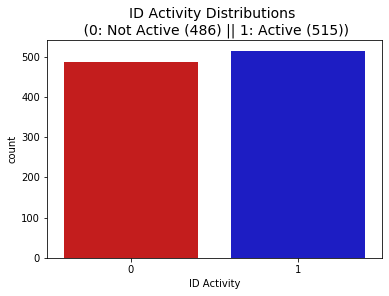

In [39]:
colors = ["#DF0101", "#0101DF"]

sns.countplot('ID Activity', data=df, palette=colors)
plt.title('ID Activity Distributions \n (0: Not Active (486) || 1: Active (515))', fontsize=14)

C:\Users\10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



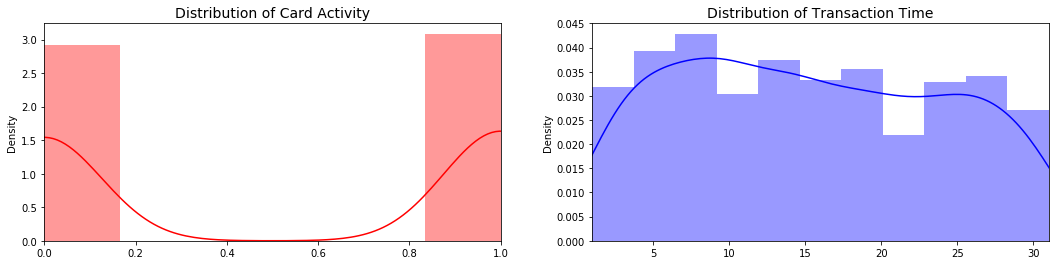

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['ID Activity'].values
time_val = df['Day of Month'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Card Activity', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [41]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Activity'] = rob_scaler.fit_transform(df['ID Activity'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Day of Month'].values.reshape(-1,1))

df.drop(['Time','Activity'], axis=1, inplace=True)


In [42]:
ID_Activity = df['ID Activity']
Time = df['Day of Month']

df.drop(['ID Activity', 'Day of Month'], axis=1, inplace=True)
df.insert(0, 'ID Activity', ID_Activity)
df.insert(1, 'Day of Month', Time)

# Amount and Time are Scaled!

df.head()

,ID Activity,Day of Month,User Id,Gate Number
0,0,9,4480013,8
1,1,12,8714242,2
2,0,30,4018706,7
3,0,15,5546910,7
4,1,13,4141903,3


Splitting the Data (Original DataFrame)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold

print('Not Active', round(df['ID Activity'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Active', round(df['ID Activity'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('ID Activity', axis=1)
y = df['ID Activity']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Not Active 48.55 % of the dataset
Active 51.45 % of the dataset
Train: [ 187  188  189  191  193  194  195  196  197  198  199  200  203  205
  206  209  210  211  213  214  215  216  221  224  225  226  227  228
  229  230  231  232  233  234  235  236  237  238  239  240  241  242
  243  244  245  246  247  248  249  250  251  252  253  254  255  256
  257  258  259  260  261  262  263  264  265  266  267  268  269  270
  271  272  273  274  275  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  318  319  320  321  322  323  324  325  326
  327  328  329  330  331  332  333  334  335  336  337  338  339  340
  341  342  343  344  345  346  347  348  349  350  351  352  353  354
  355  356  357  358  359  360  361  362  363  364  365  366  367  368
  369  370  371  372  373  374  375  376  377  378  379  380  381  382
  383 

In [44]:
df

,ID Activity,Day of Month,User Id,Gate Number
0,0,9,4480013,8
1,1,12,8714242,2
2,0,30,4018706,7
3,0,15,5546910,7
4,1,13,4141903,3
...,...,...,...,...
996,1,29,1452679,8
997,0,9,5511387,2
998,1,9,1003300,6
999,1,13,7557706,1


In [45]:
df.sort_values('ID Activity', inplace=True)
df

,ID Activity,Day of Month,User Id,Gate Number
0,0,9,4480013,8
544,0,5,1829590,6
546,0,23,4656947,4
547,0,7,1692141,6
548,0,8,7380231,4
...,...,...,...,...
592,1,28,1071814,1
593,1,9,3328637,9
594,1,6,2446907,5
528,1,26,4667661,7


In [46]:
df = df[df['ID Activity'] !=0]
df

,ID Activity,Day of Month,User Id,Gate Number
88,1,18,4810411,7
796,1,11,6055823,6
106,1,30,2922365,1
104,1,19,4257373,1
103,1,8,5295445,1
...,...,...,...,...
592,1,28,1071814,1
593,1,9,3328637,9
594,1,6,2446907,5
528,1,26,4667661,7


In [47]:
df.describe()

,ID Activity,Day of Month,User Id,Gate Number
count,515.0,515.000000,5.150000e+02,515.000000
mean,1.0,15.446602,4.757400e+06,4.966990
std,0.0,8.789727,2.187052e+06,2.631905
min,1.0,1.000000,1.003300e+06,1.000000
25%,1.0,8.000000,2.861050e+06,3.000000
50%,1.0,15.000000,4.649031e+06,5.000000
75%,1.0,23.000000,6.591867e+06,7.000000
max,1.0,31.000000,8.976799e+06,9.000000


In [48]:
print('Actives', round(df['ID Activity'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


Actives 100.0 % of the dataset


C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'ID Activity Distributions \n (1: Active (515) || 0:Not Active (0))')

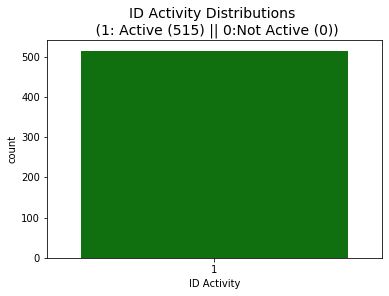

In [49]:
colors = ["Green", "#DF0101"]

sns.countplot('ID Activity', data=df, palette=colors)
plt.title('ID Activity Distributions \n (1: Active (515) || 0:Not Active (0))', fontsize=14)

In [50]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Activity'] = rob_scaler.fit_transform(df['ID Activity'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Day of Month'].values.reshape(-1,1))

df.drop(['Time','Activity'], axis=1, inplace=True)

In [51]:
X = df.drop('ID Activity', axis=1)
y = df['ID Activity']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347